<a href="https://colab.research.google.com/github/GrichinNikita2019/yandex_praktikum_da/blob/main/analytics_in_airlines/analytics_in_airlines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Аналитика в авиакомпании

У вас есть файлы, в которых содержатся результаты запросов из предыдущих заданий.

***/datasets/query_1.csv*** — результат первого запроса. В нём содержится информация о:
* model — *модели самолета*
* flights_amount — *количество рейсов для каждой модели самолетов model в сентябре 2018 года*


***/datasets/query_3.csv*** — результат третьего запроса. В нём содержится информация о:
* city — *городах*
* average_flights — *среднем количестве рейсов, прибывающих в город city за день в августе 2018 года*

**Для этих двух наборов данных нужно:**
1. Импортировать файлы;
2. Изучить данные в них;
3. Проверить типы данных на корректность;
4. Выбрать топ-10 городов по количеству рейсов;
5. Построить графики: модели самолетов и количество рейсов, города и количество рейсов, топ-10 городов и количество рейсов;
6. Сделать выводы по каждому из графиков, пояснить результат.

## Импортирование файлов

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

In [ ]:
models = pd.read_csv('/datasets/query_1.csv')
cities = pd.read_csv('/datasets/query_3.csv')

## Подготовка данных

Осуществим проверку типов данных на коректность.

In [ ]:
models.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


In [ ]:
cities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


Все данные нужного типа!

Проверим наши данные на наличие пропусков.

In [ ]:
pd.DataFrame(round((models.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
model,0
flights_amount,0


In [ ]:
pd.DataFrame(round((cities.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
city,0
average_flights,0


Пропуски в данных отсутствуют.

Также проверим таблицы на наличие дубликатов.

In [ ]:
models.duplicated().sum()

0

In [ ]:
cities.duplicated().sum()

0

Дубликатов нет.

## Изучение данных

### Количество рейсов по моделям самолетов

In [ ]:
models.sort_values('flights_amount', ascending=False)

,model,flights_amount
6,Cessna 208 Caravan,4557
5,Bombardier CRJ-200,4446
7,Sukhoi SuperJet-100,4185
1,Airbus A321-200,960
2,Boeing 737-300,630
0,Airbus A319-100,607
3,Boeing 767-300,600
4,Boeing 777-300,300


In [ ]:
models.describe()

,flights_amount
count,8.000
mean,2035.625
std,1965.204
min,300.000
25%,605.250
50%,795.000
75%,4250.250
max,4557.000


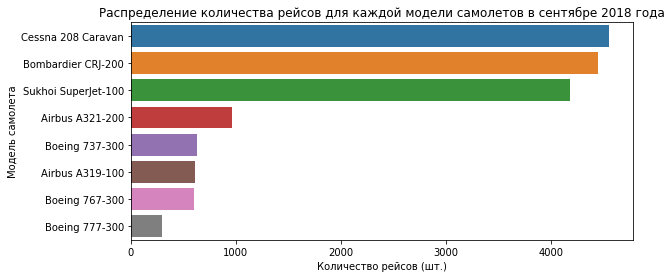

In [ ]:
fig = plt.subplots(figsize=(9, 4))
ax = sns.barplot(x="flights_amount", y="model", data=models.sort_values("flights_amount", ascending=False));
ax.title.set_text('Распределение количества рейсов для каждой модели самолетов в сентябре 2018 года');
ax.set_xlabel('Количество рейсов (шт.)');
ax.set_ylabel('Модель самолета');

Всего в таблице models представлено 7 наблюдений (моделей самолетов).
Модели самолетов по количеству рейсов в сентябре можно разделить на несколько групп:
1. **Лидеры по числу полетов**: Cessna 208 Caravan (4 557 полетов), Bombardier CRJ-200 (4 446 полетов), Sukhoi SuperJet-100 (4 185 полетов);
2. Следом с большим отставанием идет модель **Airbus A321-200** (960 полетов);
3. Далее идет **группа аутсайдеров** с приблизительно равным количеством полетов: Boeing 737-300 (630 полетов), Airbus A319-100 (607 полетов), Boeing 767-300 (600 полетов);
4. Наименьшее число рейсов зафиксировано по модели **Boeing 777-300** (300 полетов).

### Среднее количество рейсов по городам

In [ ]:
cities.sort_values('average_flights', ascending=False).head(11)

,city,average_flights
43,Москва,129.774
70,Санкт-Петербург,31.161
54,Новосибирск,17.323
33,Красноярск,11.581
20,Екатеринбург,11.323
67,Ростов-на-Дону,10.194
63,Пермь,10.129
10,Брянск,10.000
74,Сочи,9.613
84,Ульяновск,9.581


In [ ]:
cities.sort_values('average_flights', ascending=False).tail(11)

,city,average_flights
88,Усть-Кут,1.000
76,Стрежевой,1.000
1,Анадырь,1.000
9,Братск,1.000
8,Благовещенск,1.000
21,Иваново,1.000
22,Ижевск,1.000
65,Петропавловск-Камчатский,1.000
31,Комсомольск-на-Амуре,1.000
58,Нягань,1.000


In [ ]:
cities.describe()

,average_flights
count,101.000
mean,5.494
std,13.120
min,1.000
25%,2.000
50%,3.000
75%,5.871
max,129.774


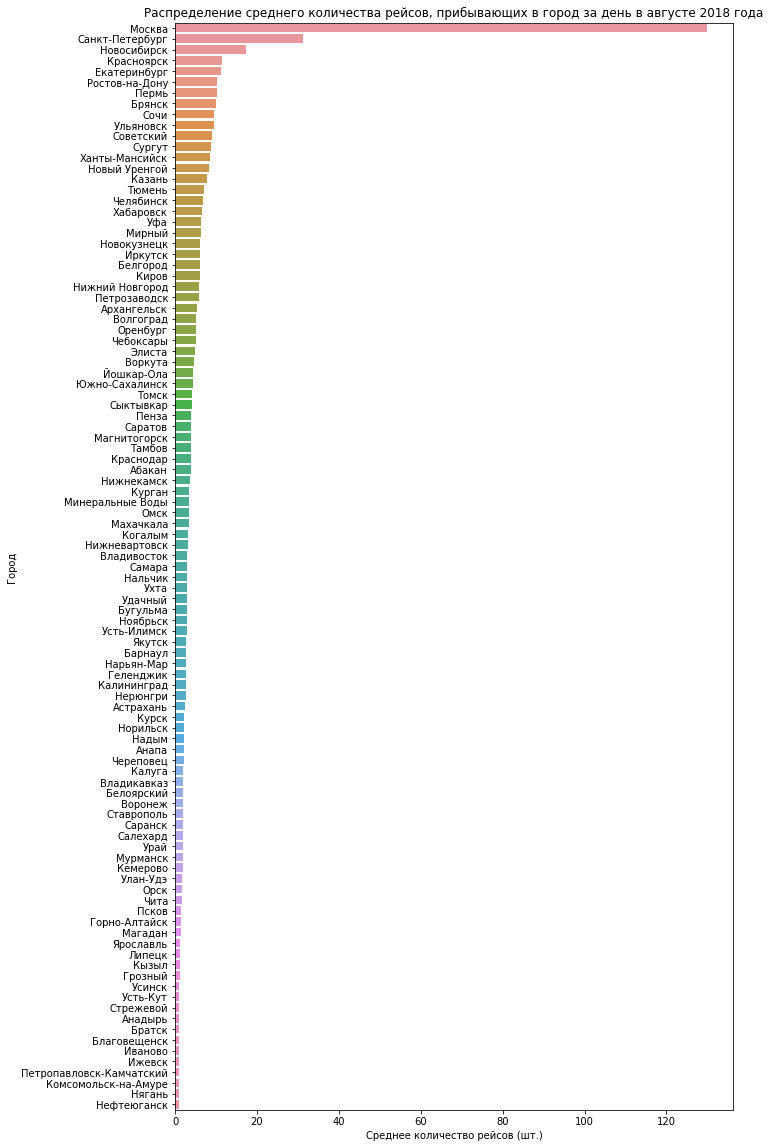

In [ ]:
fig = plt.subplots(figsize=(10, 20))
ax = sns.barplot(x="average_flights", y="city", data=cities.sort_values("average_flights", ascending=False));
ax.title.set_text('Распределение среднего количества рейсов, прибывающих в город за день в августе 2018 года');
ax.set_xlabel('Среднее количество рейсов (шт.)');
ax.set_ylabel('Город');

Лидирующую позицию по среднему количеству рейсов с большим отрывом занимает **Москва** (130 рейсов);

Вторую позицию занимает **Санкт-Петербург** (31 рейс);

Такой отрыв Москвы (в особенности) и Санкт-Петербурга объясняется, как большим объемом населения, так и большими туристическими потоками, а также замкнутостью транспортной системы РФ на этих городах (большая часть пересадок осуществляется в них).

Третье место - **Новосибирск** (17 рейсов). Что тоже неудивительно, так как это 3 по численности населения город РФ;

Начиная с Краснодара и далее по графику наблюдается постепенное снижение среднего числа рейсов;

**Замыкают список города со среднем количеством рейсов равным единице**: Нефтеюганск, Нягань, Комсомольск-на-Амуре, Петропавловск-Камчатский и т.д.

### Среднее количество рейсов по городам (топ-10)

Для начала необходимо составить топ-10 городов по среднему количеству рейсов, прибывающих в город за день в августе 2018 года.

In [ ]:
cities_top_10 = cities.sort_values('average_flights',ascending=False).head(10)

In [ ]:
cities_top_10

,city,average_flights
43,Москва,129.774
70,Санкт-Петербург,31.161
54,Новосибирск,17.323
33,Красноярск,11.581
20,Екатеринбург,11.323
67,Ростов-на-Дону,10.194
63,Пермь,10.129
10,Брянск,10.000
74,Сочи,9.613
84,Ульяновск,9.581


Топ готов! Теперь можно строить график.

In [ ]:
cities_top_10.describe()

,average_flights
count,10.000
mean,25.068
std,37.389
min,9.581
25%,10.032
50%,10.758
75%,15.887
max,129.774


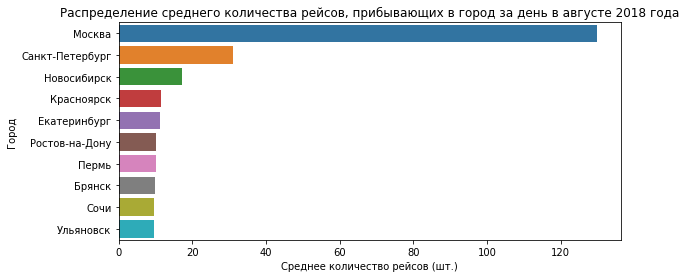

In [ ]:
fig = plt.subplots(figsize=(9, 4))
ax = sns.barplot(x="average_flights", y="city", data=cities_top_10.sort_values("average_flights", ascending=False));
ax.title.set_text('Распределение среднего количества рейсов, прибывающих в город за день в августе 2018 года');
ax.set_xlabel('Среднее количество рейсов (шт.)');
ax.set_ylabel('Город');

**Топ-10 городов по среднему количеству рейсов составляют следующие города:**
1. Москва (130 рейсов)
2. Санкт-Петербург (31 рейс)
3. Новосибирск (17 рейсов)
4. Красноярск (12 рейсов)
5. Екатеринбург (11 рейсов)
6. Ростов-на-Дону (10 рейсов)
7. Пермь (10 рейсов)
8. Брянск (10 рейсов)
9. Сочи (10 рейсов)
10. Ульяновск (10 рейсов)

## Общий вывод

***Основные выводы:***

**Модели самолетов по количеству рейсов в сентябре можно разделить на несколько групп:**


1. **Лидеры по числу полетов**: Cessna 208 Caravan (4 557 полетов), Bombardier CRJ-200 (4 446 полетов), Sukhoi SuperJet-100 (4 185 полетов);
2. Следом с большим отставанием идет модель **Airbus A321-200** (960 полетов);
3. Далее идет **группа аутсайдеров** с приблизительно равным количеством полетов: Boeing 737-300 (630 полетов), Airbus A319-100 (607 полетов), Boeing 767-300 (600 полетов);
4. Наименьшее число рейсов зафиксировано по модели **Boeing 777-300** (300 полетов).

**Города по среднему количеству рейсов в сентябре можно также разделить на несколько групп:**

1. Лидирующую позицию по среднему количеству рейсов с большим отрывом занимает **Москва** (130 рейсов);

2. Вторую позицию занимает **Санкт-Петербург** (31 рейс);

- *Такой отрыв Москвы (в особенности) и Санкт-Петербурга объясняется, как большим объемом населения, так и большими туристическими потоками, а также замкнутостью транспортной системы РФ на этих городах (большая часть пересадок осуществляется в них).*

3. Третье место - **Новосибирск** (17 рейсов). Что тоже неудивительно, так как это 3 по численности населения город РФ;

4. Начиная с Краснодара и далее по графику наблюдается постепенное снижение среднего числа рейсов;

5. **Замыкают список города со среднем количеством рейсов равным единице**: Нефтеюганск, Нягань, Комсомольск-на-Амуре, Петропавловск-Камчатский и т.д.

**Топ-10 городов по среднему количеству рейсов составляют следующие города:**
1. Москва (130 рейсов)
2. Санкт-Петербург (31 рейс)
3. Новосибирск (17 рейсов)
4. Красноярск (12 рейсов)
5. Екатеринбург (11 рейсов)
6. Ростов-на-Дону (10 рейсов)
7. Пермь (10 рейсов)
8. Брянск (10 рейсов)
9. Сочи (10 рейсов)
10. Ульяновск (10 рейсов)